## 📓 01_transformer_arkitektur.ipynb

# 🧠 Transformer-arkitekturen: Grunnlaget for moderne AI

## Læringsmål
- Forstå self-attention mekanismen
- Visualisere hvordan transformers prosesserer tekst
- Koble arkitekturen til praktisk bruk i helsevesenet

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

print("📚 Transformer-arkitektur - La oss starte!")

📚 Transformer-arkitektur - La oss starte!


## Hva er Attention?

Attention lar modellen fokusere på relevante deler av inputen.
I medisinsk kontekst: Når vi leser "pasienten har diabetes", 
må AI forstå at "diabetes" er relatert til "pasienten".

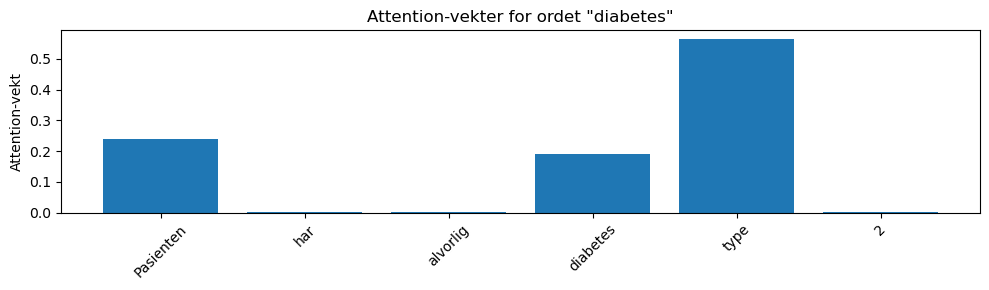

Høyest attention: type


In [4]:
# Enkel demonstrasjon av attention
def simple_attention(query, keys, values):
    """
    Forenklet attention-mekanisme
    """
    # Beregn likhet mellom query og keys
    scores = np.dot(query, keys.T)
    
    # Normaliser med softmax
    weights = np.exp(scores) / np.sum(np.exp(scores))
    
    # Vektet sum av values
    output = np.dot(weights, values)
    
    return output, weights

# Eksempel: Medisinsk setning
words = ["Pasienten", "har", "alvorlig", "diabetes", "type", "2"]
word_embeddings = np.random.randn(6, 4)  # 6 ord, 4 dimensjoner

# La oss finne attention for ordet "diabetes"
query_idx = 3  # "diabetes"
query = word_embeddings[query_idx]

output, attention_weights = simple_attention(
    query, word_embeddings, word_embeddings
)

# Visualiser attention
plt.figure(figsize=(10, 3))
plt.bar(words, attention_weights)
plt.title(f'Attention-vekter for ordet "{words[query_idx]}"')
plt.ylabel('Attention-vekt')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Høyest attention: {words[np.argmax(attention_weights)]}")

## Multi-Head Attention

I praksis bruker transformers multiple attention "heads" 
som kan fokusere på ulike aspekter samtidig:
- Head 1: Grammatiske relasjoner
- Head 2: Semantiske koblinger
- Head 3: Medisinsk terminologi

In [5]:
class SimpleTransformerBlock(nn.Module):
    """Forenklet transformer-blokk for demonstrasjon"""
    
    def __init__(self, d_model=512, n_heads=8):
        super().__init__()
        self.attention = nn.MultiheadAttention(d_model, n_heads)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.feed_forward = nn.Sequential(
            nn.Linear(d_model, 2048),
            nn.ReLU(),
            nn.Linear(2048, d_model)
        )
    
    def forward(self, x):
        # Self-attention
        attn_output, _ = self.attention(x, x, x)
        x = self.norm1(x + attn_output)
        
        # Feed-forward
        ff_output = self.feed_forward(x)
        x = self.norm2(x + ff_output)
        
        return x

# Demonstrer
model = SimpleTransformerBlock()
print(f"Transformer-blokk opprettet med {sum(p.numel() for p in model.parameters()):,} parametere")

Transformer-blokk opprettet med 3,152,384 parametere


## 💡 Praktisk betydning for helsevesenet

Transformers muliggjør:
1. **Journalsammendrag**: Automatisk oppsummering av lange journaler
2. **Diagnosestøtte**: Koble symptomer til mulige diagnoser
3. **Medisininteraksjoner**: Oppdage potensielle legemiddelinteraksjoner
4. **Pasientkommunikasjon**: Forklare medisinske termer enkelt



### Refleksjon
Hvordan kan attention-mekanismen hjelpe med å identifisere 
viktig informasjon i en pasientjournal?